# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。  

`Penguins.csv`每列的含义如下：

- species：企鹅的种类。
- island：企鹅所在岛屿。
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）。
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）。
- flipper_length_mm：企鹅鳍的长度（单位为毫米）。
- body_mass_g：企鹅体重（单位为克）。
- sex：企鹅性别。

## 读取数据

导入数据分析所需要的库，使用`pandas`库里的`read_csv`函数，解析原始文件`pengunis.csv`为Dataframe并赋值给`original_data`变量。

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
original_data = pd.read_csv("./penguins_size.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 评估和清洗数据

在这一部分中，我们将对在上一部分建立的`original_data`DataFrame所包含的数据进行评估和清理。  

主要从两个方面进行：结构和内容，即整齐度和干净度。
数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。
为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本。我们之后的清理步骤都将被运用在`cleaned_data`。

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度

In [4]:
cleaned_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
32,Adelie,Dream,39.5,17.8,188.0,3300.0,FEMALE
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,MALE
177,Chinstrap,Dream,52.0,19.0,197.0,4150.0,MALE
245,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,MALE
210,Chinstrap,Dream,50.2,18.8,202.0,3800.0,MALE
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,MALE
48,Adelie,Dream,36.0,17.9,190.0,3450.0,FEMALE
166,Chinstrap,Dream,45.9,17.1,190.0,3575.0,FEMALE
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE


从数据的抽样来看，数据满足“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准，所以数据不具有结构性问题。

### 数据干净度

先用`pandas`的`info`方法对数据的大致信息做一个了解。

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


可以了解到`culmen_length_mm`，`culmen_depth_mm`，`flipper_length_mm `，`body_mass_g`，`sex`属性都存在缺失值。提取存在缺失值的观察值进行分析。

并且由于`species`，`island`，`sex`都是分类数据，因此可以将它们转换为`category`数据类型，节约存储空间。

In [6]:
cleaned_data["species"] = cleaned_data["species"].astype("category")
cleaned_data["island"] = cleaned_data["island"].astype("category")
cleaned_data["sex"] = cleaned_data["sex"].astype("category")

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


In [8]:
cleaned_data.query("culmen_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
cleaned_data.query("sex.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


### 评估并处理缺失数据

从上面的数据提取可以看出，`culmen_length_mm`，`culmen_depth_mm`，`flipper_length_mm `，`body_mass_g`四个变量的缺失值同时存在于两个观察值中，这两个观察值对后续的分析并没有有效的贡献，应当删除。而`sex`属性缺失的观察值在其他属性上的值仍有分析意义，并且由于`Matapolib`，`Seaborn`可以自动忽略缺失值，所以可以保留。

In [10]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)

### 评估并处理重复数据

In [12]:
cleaned_data[cleaned_data.duplicated()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


经过筛选并没有发现重复数据。

### 评估并处理不一致数据

经过分析，不一致数据可能存在于`species`，`island`两个属性当中。

In [13]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [14]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

可以发现，并不存在不一致数据。

### 评估并处理错误或无效数据

In [15]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从以上的信息来看，并不存在错误或无效的数据。

## 数据探索

我们将通过数据可视化，对数据进行探索和分析，从图表中获得企鹅样本数据的相关洞察。

In [20]:
# 设置图表色盘
sns.set_palette("pastel")

### 企鹅种类占比

In [23]:
species_count = cleaned_data["species"].value_counts()

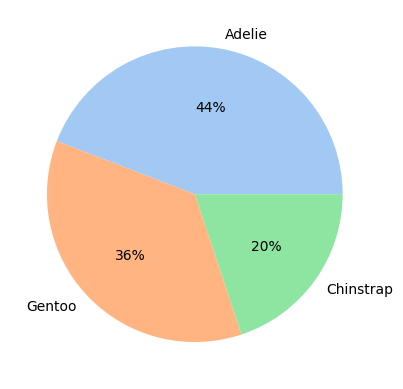

In [25]:
plt.pie(species_count, labels=species_count.index, autopct="%0.0f%%")
plt.show()

样本中`Adelie`种类占比最大，`Gentoo`种类次之，`Chinstrap`种类占比最小。

### 企鹅所属岛屿占比

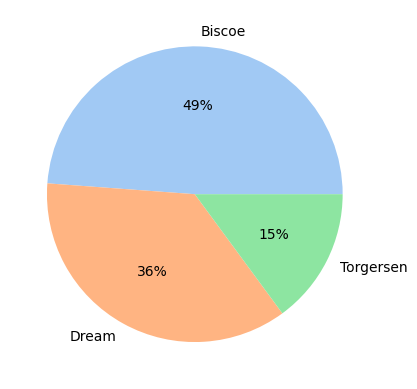

In [26]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, labels=island_count.index, autopct="%0.0f%%")
plt.show()

可以看出有接近一半的企鹅样本来自`Biscoe`岛屿，占比最大，其次是`Dream`岛屿，`Togersen`岛屿占比最少。

### 企鹅性别比例

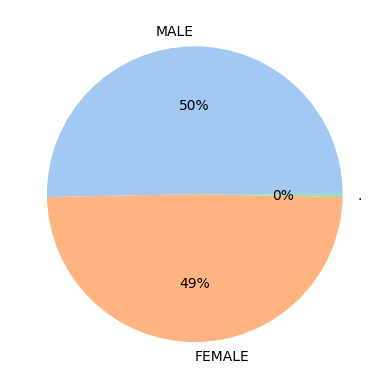

In [28]:
sex_count = cleaned_data["sex"].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct="%0.0f%%")
plt.show()

样本性别占比持平，符合预期。

### 不同岛上的企鹅种类数量

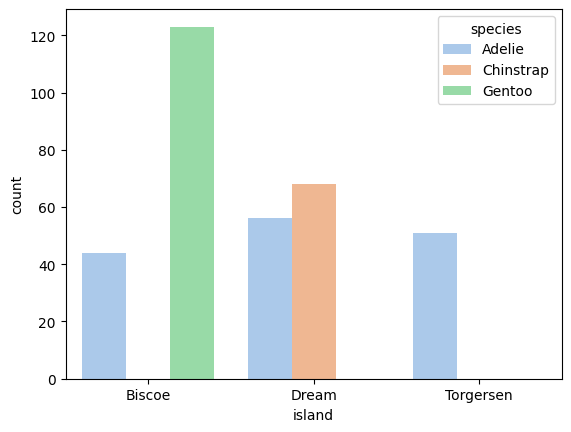

In [32]:
sns.countplot(data=cleaned_data, x="island", hue="species")
plt.show()

从以上可以看出，`Adelie`种类的企鹅在每个岛上都有，而`Chinstrap`种类的企鹅只有在`Dream`岛上才有，`Gentoo`种类的企鹅只有在`Biscoe`岛上才有。

### 不同岛屿上企鹅性别的分布

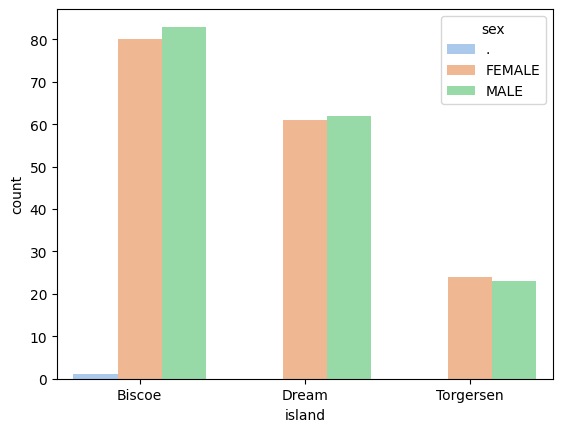

In [33]:
sns.countplot(data=cleaned_data, x="island", hue="sex")
plt.show()

### 查看数值之间的相关关系

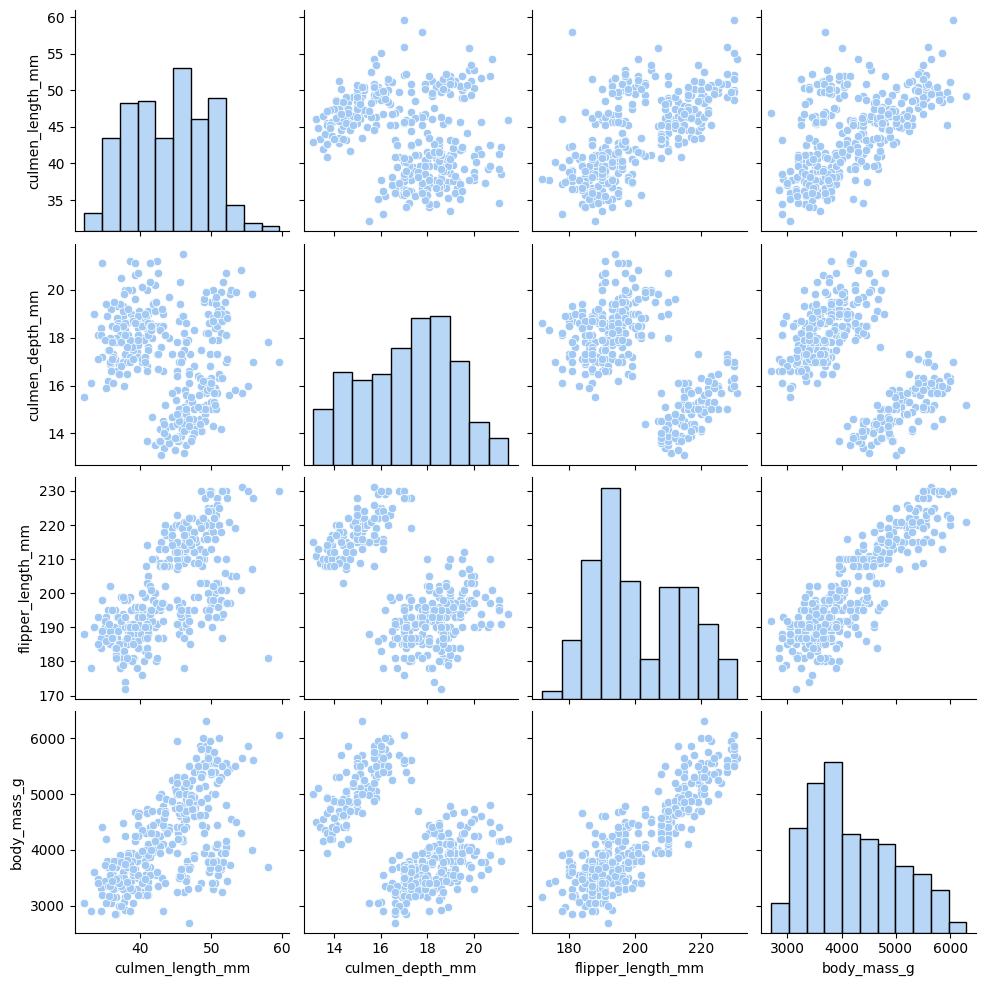

In [35]:
sns.pairplot(cleaned_data)
plt.show()

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。  

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

### 根据种类查看数值之间的相关关系

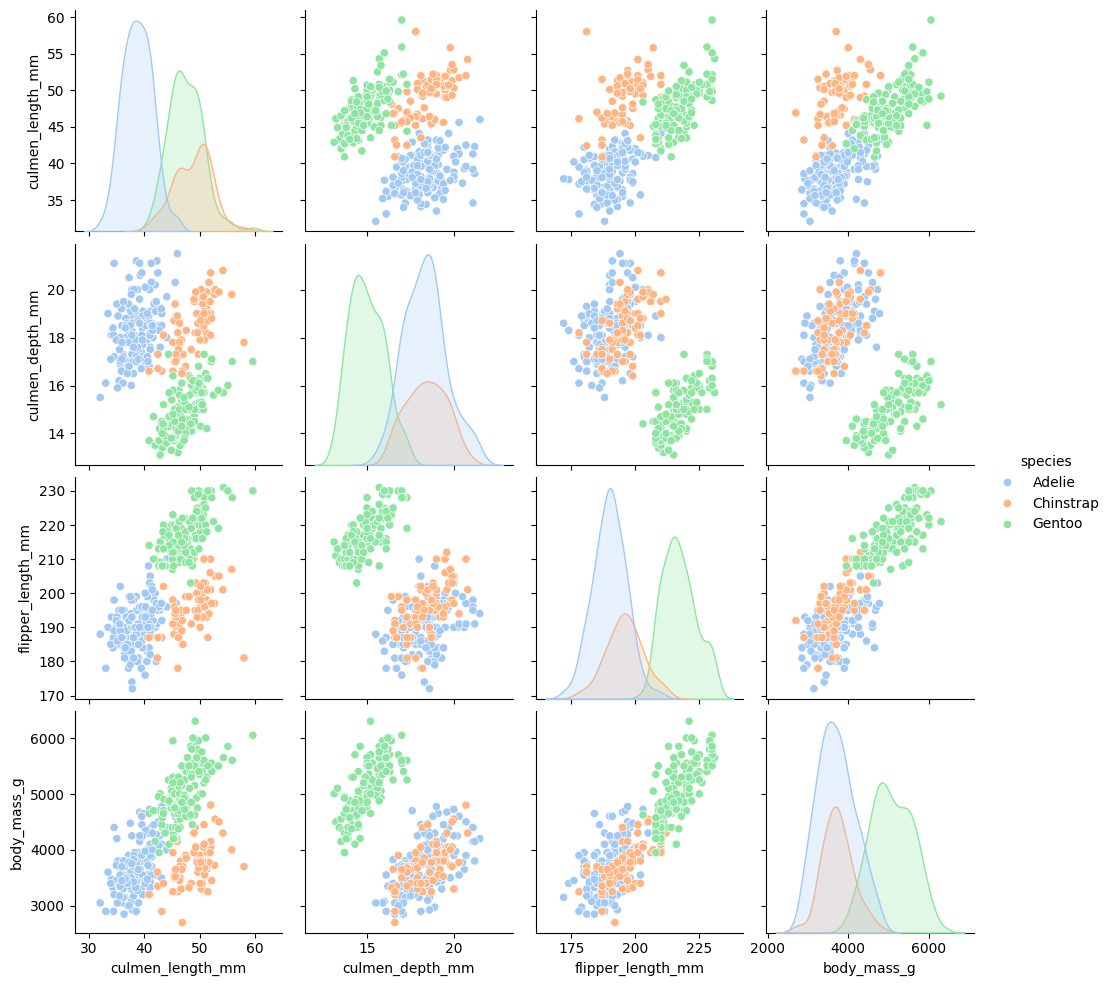

In [37]:
sns.pairplot(cleaned_data, hue="species")
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

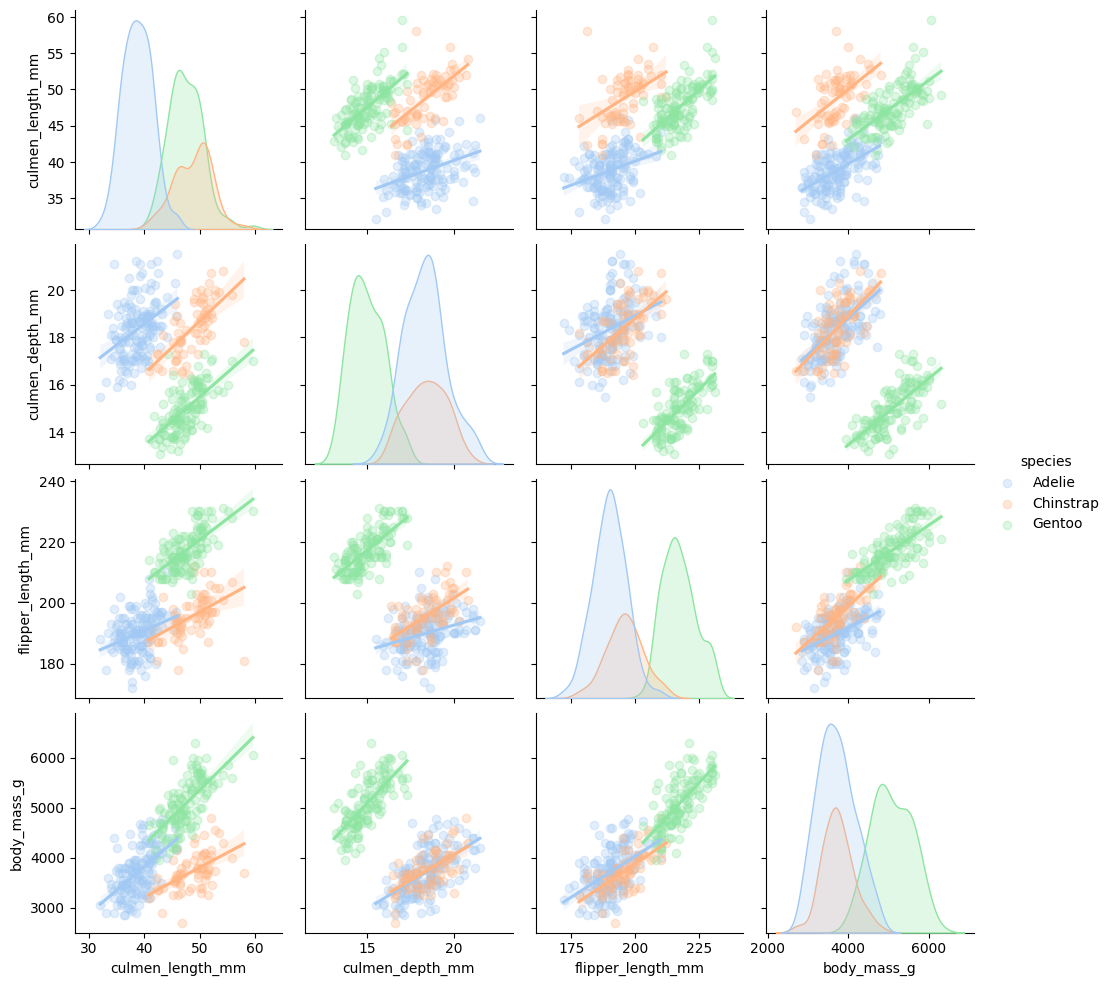

In [39]:
sns.pairplot(cleaned_data, hue="species", kind="reg", plot_kws={"scatter_kws":{'alpha':0.3}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。  

从密度图的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。
但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

### 根据性别查看数值之间的相关关系

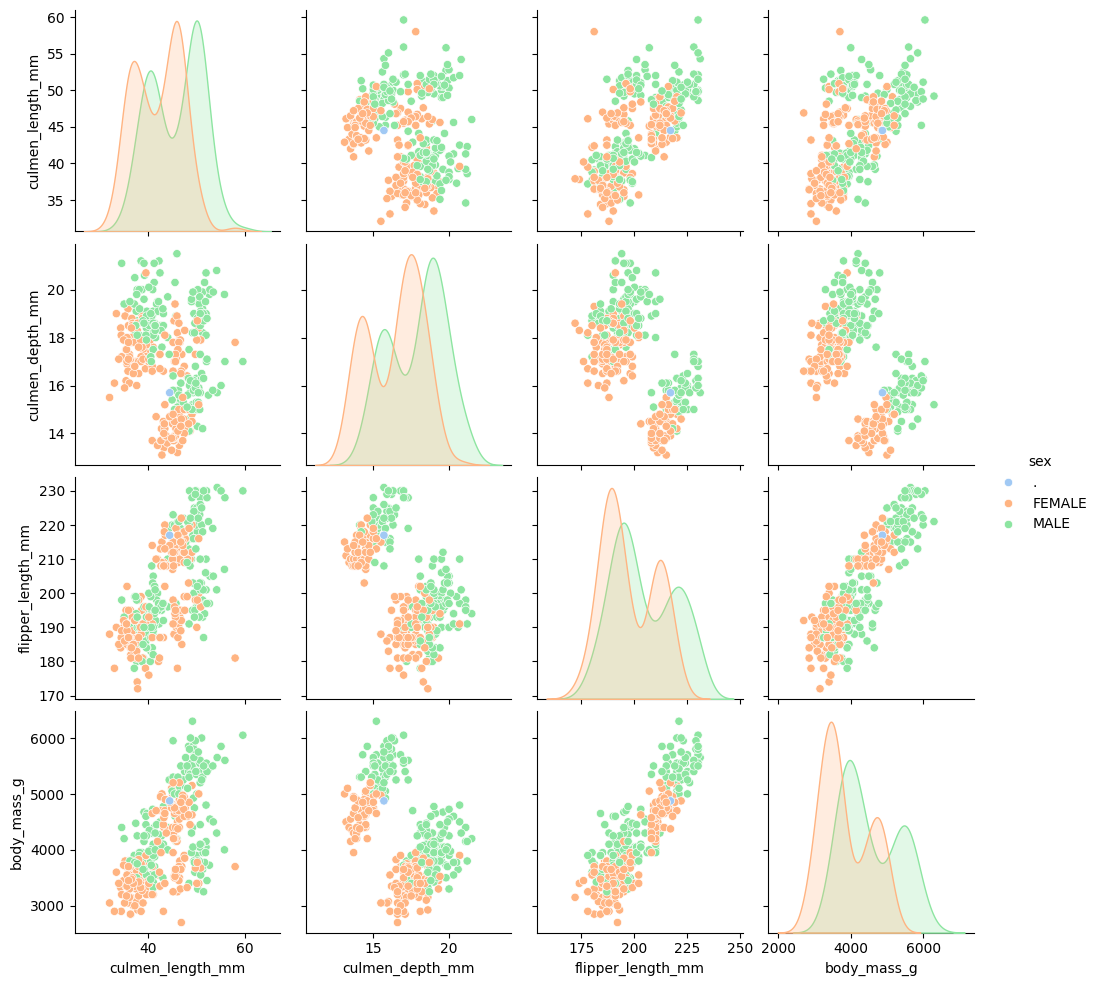

In [42]:
sns.pairplot(cleaned_data, hue="sex")
plt.show()

从以上的图表可以看出，雄性企鹅的各项数值平均来说都比雌性企鹅要高。